# Walmart sales data analysis

## Aim

To predict aggregate monthly sales using Regression models over Walmart dataset.

## Objectives
- Getting familiar with data analysis techniques
- Learning about prediction models/algorithms through experimentation

## Methodology

- Step 0: Environment Setup
- Step 1: Reading data
- Step 2: Merging and correlation analysis
- Step 3: Testing different prediction algorithms
- Step 4: Inserting small UI elements to customise algorithms and dataframes

In [1]:
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd  
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from ipywidgets import widgets
from IPython.display import display
from calendar import month_name
import sys
import os
current_dir = os.getcwd()
sys.path.insert(1, current_dir + "/project")

%matplotlib inline

## Loading Data into dataframes

In [2]:
train = pd.read_csv("./data/train.csv")
stores = pd.read_csv("./data/stores.csv")
features = pd.read_csv("./data/features.csv")

## Exploring data

**Total rows are 8190.**

**There are twelve columns.**

In [3]:
features.info() #can be shown on the web page

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


- Date is recognised as an "Object" by pandas.
- It means that it is not recognised as any pre-defined Python type

### Getting an overview of data

In [4]:
features.describe()
#can also be shown on the web page
# Analysis and calculations regarding quantitative columns

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [5]:
# Including object
# Date column
features.describe(include=object)

,Date
count,8190
unique,182
top,2010-03-26
freq,45


In [6]:
# Including object
# Date column
features.describe(include=bool)

,IsHoliday
count,8190
unique,2
top,False
freq,7605


In [7]:
features.count()

Store           8190
Date            8190
Temperature     8190
Fuel_Price      8190
MarkDown1       4032
MarkDown2       2921
MarkDown3       3613
MarkDown4       3464
MarkDown5       4050
CPI             7605
Unemployment    7605
IsHoliday       8190
dtype: int64

In [8]:
# Counting Null values
features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [9]:
print(len(stores))
stores.isna().sum()

45


Store    0
Type     0
Size     0
dtype: int64

In [10]:
print(len(train))
train.isna().sum()

421570


Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

## Cleaning the data

In [11]:
train = pd.read_csv("./data/train.csv")
stores = pd.read_csv("./data/stores.csv")
features = pd.read_csv("./data/features.csv")

for i in range(1, 6):
    features[f"MarkDown{i}"] = features[f"MarkDown{i}"].fillna(0)
features["Unemployment"] = features["Unemployment"].fillna(np.mean(features["Unemployment"]))
features["CPI"] = features["CPI"].fillna(np.mean(features["CPI"]))

main = pd.merge(train, stores, on = "Store", how = "right", sort = False)
main = pd.merge(main, features, on = ["Store", "Date"], how = "left", sort = False)

main = main.sort_values(by=["Date"])


main["Month"] = pd.to_datetime(main["Date"]).dt.month
main["Year"] = pd.to_datetime(main["Date"]).dt.year

main["IsHoliday"] = main["IsHoliday_y"]
main.drop(labels=["IsHoliday_y", "IsHoliday_x", "Date"], axis = 'columns', inplace=True)

months = ['All','January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
temp = pd.get_dummies(main.Type)
main = pd.concat([main, temp], axis='columns')
main = main.drop(columns=['Type'])

main.to_csv('./data/out.csv')

In [12]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


In [13]:
print(len(pd.unique(features["Store"])))

45


In [14]:
print(len(pd.unique(train["IsHoliday"])))

2


In [15]:
main.head()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Month,Year,IsHoliday,A,B,C
0,1,1,24924.50,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,2010,False,1,0,0
277665,29,5,15552.08,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2,2010,False,0,1,0
277808,29,6,3200.22,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2,2010,False,0,1,0
277951,29,7,10820.05,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2,2010,False,0,1,0
278094,29,8,20055.64,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2,2010,False,0,1,0


In [16]:
# filling in missing values

#from knnimpute import optimistic
# Calculating missing mask for main["MarkDown1"]
#mm = []

#mm = main["MarkDown1"].apply(lambda e:True if e == None else False)
#type(main["MarkDown1"])
#main["MarkDown1"] = optimistic.knn_impute_optimistic(X = pd.core.series.Series(main["MarkDown1"]),missing_mask = mm ,k = 10)

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '11'),
 Text(11, 0, '12')]

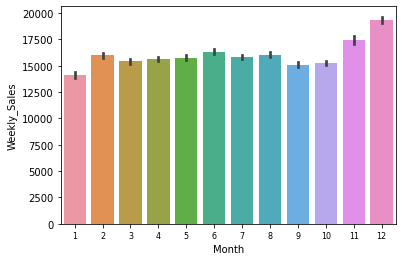

In [17]:
bar_plot = sns.barplot(x="Month", y="Weekly_Sales",  data=main)
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), fontsize=8)

#can be included in a dataframe

In [19]:
len(main)

421570

<AxesSubplot:>

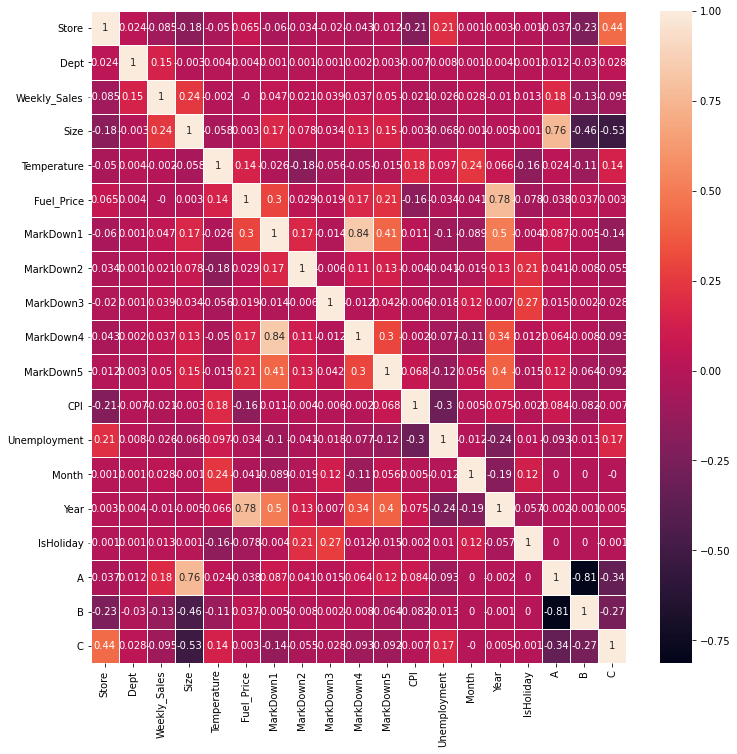

In [18]:
correlation_matrix = main.corr().round(3)

figure, axes = plt.subplots(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=True, linewidths=.7, ax=axes)

#can be kept on a web page

#### Observations

- **High positive correlation with Weekly_Sales**
  - Dept - .15
  - Size - .24
- **High negative correlation with Weekly_Sales**
  - NA

- MarkDown1 and MarkDown4 are highly correlated so only taking one of them should be sufficient. ~Also, summing up MarkDowns is a good idea.~

## Data analysis

In [22]:
# Make a different dataframe for every month - or aggregate it
# Test rmse and r^2 for different models

In [23]:
main.tail()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown5,CPI,Unemployment,Month,Year,IsHoliday
107237,11,94,2011-12-30,29340.71,A,207499,48.86,3.129,4241.32,58046.41,239.33,586.72,223.009084,7.197,12,2011,True
140486,15,18,2011-12-30,12439.07,B,123737,31.44,3.566,3248.40,31122.20,111.35,3474.84,136.643258,7.866,12,2011,True
101864,11,30,2011-12-30,5749.36,A,207499,48.86,3.129,4241.32,58046.41,239.33,586.72,223.009084,7.197,12,2011,True
350341,37,46,2011-12-30,6906.95,C,39910,48.26,3.129,373.92,1057.77,1.50,741.34,218.230236,7.716,12,2011,True
396257,42,82,2011-12-30,8245.06,C,39690,48.92,3.428,242.41,1447.26,3.64,459.06,130.071032,7.874,12,2011,True


In [24]:
# RF
# KNN
# DecisionTree

In [20]:
X = pd.DataFrame(np.c_[main['Dept'], main['Size']], columns = ['Dept','Size'])
Y = main['Weekly_Sales']

In [21]:
X_train, X_test, Y_train, Y_test = sc.split_data(X, Y)
print(type(Y))

NameError: name 'sc' is not defined

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

In [ ]:
er.error_calculator(model, X_train, Y_train, X_test, Y_test)

In [ ]:

months = ['All','January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

"""
month_dict = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}
"""

toggle_buttons = widgets.ToggleButtons(
    options=['Monthly Prediction', 'Annual Prediction'],
    value='Monthly Prediction',
    description='Options',
    disabled=False,
    button_style='info',
    tooltips=['Predict monthwise sales', 'Predict sales on Annual basis']
)

toggle_buttons

In [ ]:
month_select = widgets.Dropdown(options = months, value = 'January', description = 'Month', disabled = False)
if toggle_buttons.value == 'Annual Prediction':
    month_select.disabled = True
    month_select.value = 'All'
month_select

In [ ]:
# Make dataframe according to the month that was selected
# if it was all, leave the df as it was

df = main
df.head()

if not month_select.value == 'All':
    df.set_index(keys = ['Month'], drop = False, inplace = True)
    df = df.loc[df.Month == months.index(month_select.value)]
df.head()

In [ ]:
models = ["KNN", "RandomForest", "DecisionTree"]

model_select = widgets.Dropdown(options = models, value = 'KNN', description = 'Algorithms', disabled = False)

model_select

In [ ]:
df.head()

In [ ]:
X = pd.DataFrame(np.c_[df['Store'],
                       df['Dept'],
                       df['Size'], 
                       df['Temperature'],
                       df['Fuel_Price'],
                       df['CPI'],
                       df['Unemployment'],
                       df['Year'],
                       df['IsHoliday'],
                       df['MarkDown3'],
                       df['Type'],
                       df['Month']],
                 
                 columns = ['Store',
                            'Dept',
                            'Size',
                            'Temperature',
                            'Fuel_Price',
                            'CPI',
                            'Unemployment',
                            'Year',
                            'IsHoliday',
                            'MarkDown3',
                            'Type',
                            'Month'])
Y = df['Weekly_Sales']
t = pd.get_dummies(X.Type)
X = pd.concat([X, t], axis='columns')
X = X.drop(columns=['Type'])

X.to_csv('./data/out.csv')

In [ ]:
X_train, X_test, Y_train, Y_test = sc.split_data(X, Y)
print(type(Y))

In [ ]:
X_train, X_test = sc.standard(X_train, X_test)

In [ ]:
if(model_select.value == "KNN"):
    model, y_pred = knn_i.prediction(X_train,Y_train, X_test, Y_test)
elif (model_select.value == "RandomForest"):
    model, y_pred = rf.prediction(X_train,Y_train, X_test, Y_test)
elif (model_select.value == "DecisionTree"):
    model, y_pred = lr.prediction(X_train,Y_train, X_test, Y_test)

er.error_calculator(model, X_train, Y_train, X_test, Y_test)
plt.scatter(Y_test, y_pred)

In [ ]:
X.head()

In [ ]:
pd.DataFrame(y_pred)

## References

- https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html
- https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
- https://medium.com/analytics-vidhya/walmart-sales-forecasting-d6bd537e4904
- https://stackoverflow.com/questions/5137497/find-current-directory-and-files-directory
- https://stackoverflow.com/questions/19790790/splitting-dataframe-into-multiple-dataframes
- https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn
- https://datascience.stackexchange.com/questions/9159/when-to-choose-linear-regression-or-decision-tree-or-random-forest-regression
- https://datascience.stackexchange.com/questions/6838/when-to-use-random-forest-over-svm-and-vice-versa
- https://realpython.com/pandas-python-explore-dataset/